<a href="https://colab.research.google.com/github/Kem98m/Computer-Vision-Sampler/blob/main/homework07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 7

By: Pratik Mulpury and Kenneth Marenco


### Problem 0 (3 points)

## Part 1: Vector Geometry

### Problem 1.1 (Exam Style)

For a matrix to be invertible, there must be a matrix with which matrix multiplication will lead to the identity matrix. For there to be an inverse the matrix must be a square matrix. Because a 3x2 is not a square matrix, it has no inverse.


### Problem 1.2 (Exam Style)

If matrix B is mxn and the rank of B is n, then B has a left inverse of nxm. If a matrix B has rank m, it has a a right inverse. By this knowledge, it is derived that a square kxk matrix will have both a right and left inverse if it has rank k. This also means that the left and right inverse are equal. 

### Problem 1.3 (Exam Style)

$$ H = \frac{nn^T}{n^Tn}$$

### Problem 1.4 (Exam Style)

To get the unit vector c, you take the cross product of a and b to get
$$ C = 2i-2k$$
this is a vector orthogonal to a and b which must be normalized to make it into a unit vector.
$$ c = \frac{sqrt(2)}{2}i - \frac{sqrt(2)}{2}k$$

### Problem 1.5 (Exam Style)

The volume of the parallelpepiped is the cross product of a and b and then taking the dot product with c to get a volume of 20.

### Problem 1.6 (Exam Style)

For the face to be visible, the expression necessary is
$$ n^T(f-c) $$
This is due frame transformation. For getting the vector between the face of the cube and camera, we subtract vector c from f which is still in the world frame. We then multiply by the unit normal vector of the cube's face to get the projection.

## Part 2: Rotations in the Plane 

### Problem 2.1 (Exam Style)

$$R = \begin{bmatrix} cos(\theta)i & -sin(\theta)j \\ sin(\theta)i & cos(\theta)j \end{bmatrix}$$

### Problem 2.2 (Exam Style)

$$\tilde{R} = \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix}$$
For 
$$ P = \tilde{R}p$$

### Problem 2.3 (Exam Style)

By rotating the object (reference) frame 30 degrees, we can picture that the object frame now has some projection onto the world frame. By taking the projection of the unit vectors of the reference frame on the world's x and y axes, an independent amount of degrees was turned. This is representative by taking the sines and cosines of angle. This is independent of where the world or reference fram starts since the projections are not dependent on other factors. Because of this, a rotation of 30 degrees and then 60 degrees will achieve the same as a rotation of 60 and then 30 degrees meaning that rotation is commutative. 

## Part 3: Euler's Rotation Theorem 

### Problem 3.1 (Exam Style)

The first fact of Euler's theorem restated in terms of eigenvalues and eigenvectors is that for every rotation R, there exists a vector a with a corresponding eigenvalue 1 such that Ra=a and there is a single line xa which isn't moved by the rotation.

### Problem 3.2

In [ ]:
import numpy as np



a = np.array([20,0,0])
b = np.array([11,11,14])
c = np.cross(a,b)
print(c/np.linalg.norm(c))
print("smd")

[ 0.         -0.78631834  0.61782155]
smd


In [ ]:
import urllib.request
import pickle
from os import path as osp


def retrieve(file_name, semester='spring21', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        urllib.request.urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

rotations_pickle = 'rotations.pkl'
retrieve(rotations_pickle)
with open(rotations_pickle, 'rb') as file:
    rotations = pickle.load(file)

Downloaded file rotations.pkl


In [ ]:
def print_array(a, name=None, unit=None, indent=0):
    dims = a.ndim
    assert dims == 1 or dims == 2, 'Can only print vectors or matrices'
    tabs = '\t' * indent
    prefix = tabs if name is None else '{}{}: '.format(tabs, name)
    suffix = '' if unit is None else ' {}'.format(unit)
    with np.printoptions(precision=3, suppress=True):
        if dims == 1:
            print('{}{}{}'.format(prefix, a, suffix))
        else:
            if len(suffix):
                suffix = ' ({})'.format(suffix)
            print('{}'.format(prefix, suffix))
            for row in a:
                print(tabs, '\t', row, sep='', end='\n')

for R in rotations:
  print("For the following rotation matrix")
  print_array(R)
  print("this is the axis-angle vector.")
  print_array(rotation_matrix_to_vector(R))
  print("")
print_array(rotations[0])
rotation_matrix_to_vector(rotations[0])

For the following rotation matrix

	[1. 0. 0.]
	[0. 1. 0.]
	[0. 0. 1.]
this is the axis-angle vector.
[0. 0. 0.]

For the following rotation matrix

	[1. 0. 0.]
	[ 0.     0.866 -0.5  ]
	[0.    0.5   0.866]
this is the axis-angle vector.
[0.524 0.    0.   ]

For the following rotation matrix

	[1. 0. 0.]
	[0.    0.5   0.866]
	[ 0.    -0.866  0.5  ]
this is the axis-angle vector.
[-1.047  0.     0.   ]

For the following rotation matrix

	[0. 0. 1.]
	[0. 1. 0.]
	[-1.  0.  0.]
this is the axis-angle vector.
[0.    1.571 0.   ]

For the following rotation matrix

	[-0.     0.707 -0.707]
	[-0.707  0.5    0.5  ]
	[0.707 0.5   0.5  ]
this is the axis-angle vector.
[-0.    -1.111 -1.111]


	[1. 0. 0.]
	[0. 1. 0.]
	[0. 0. 1.]


array([0., 0., 0.])

### Problem 3.3

In [ ]:
from scipy.linalg import null_space

A = np.array([[0, -1, -1.7320508075],
              [-1, 0,0],
              [1.7320508075,0,0]
              ])
test = np.array([0,.8660254,-.5])
ns = null_space(A)
print(np.matmul(A,test))
print("kms")
print(ns)
print(np.linalg.norm(ns))



[3.75000009e-09 0.00000000e+00 0.00000000e+00]
kms
[[ 0.       ]
 [-0.8660254]
 [ 0.5      ]]
0.9999999999999999


In [ ]:

def rotation_vector_to_matrix(r):
  print(r)
  a = rotation_basis(r)[:,0]
  theta = np.linalg.norm(r)
  if(theta==0):
    np.identity(r.shape[0])
  xform = rotation_basis(r)
  rx = rotation_x(theta)
  return np.matmul(np.matmul(xform,rx),xform.T)

axis_angle_pickle = 'angle_axis.pkl'

retrieve(axis_angle_pickle)
with open(axis_angle_pickle, 'rb') as file:
    vectors = pickle.load(file)

for v in vectors:
  print_array(v,"Axis-Angle Vector")
  print_array(rotation_vector_to_matrix(v),"Rotation Matrix")

Using previously downloaded file angle_axis.pkl
Axis-Angle Vector: [0. 0. 0.]
[0. 0. 0.]
Rotation Matrix: 
	[1. 0. 0.]
	[0. 1. 0.]
	[0. 0. 1.]
Axis-Angle Vector: [0.    0.    1.047]
[0.         0.         1.04719755]
Rotation Matrix: 
	[ 0.5   -0.866  0.   ]
	[0.866 0.5   0.   ]
	[0. 0. 1.]
Axis-Angle Vector: [-0.785 -0.    -0.   ]
[-0.78539816 -0.         -0.        ]
Rotation Matrix: 
	[1. 0. 0.]
	[0.    0.707 0.707]
	[ 0.    -0.707  0.707]
Axis-Angle Vector: [1.111 1.111 0.   ]
[1.11072073 1.11072073 0.        ]
Rotation Matrix: 
	[0.5   0.5   0.707]
	[ 0.5    0.5   -0.707]
	[-0.707  0.707  0.   ]
Axis-Angle Vector: [-0.37 -0.   -0.37]
[-0.37024024 -0.         -0.37024024]
Rotation Matrix: 
	[0.933 0.354 0.067]
	[-0.354  0.866  0.354]
	[ 0.067 -0.354  0.933]


## Part 4: Perspective Projection 

### Problem 4.1

In [ ]:
from types import SimpleNamespace
def transform(p, r=None, t=None):
    if r is None:
        r = np.eye(p.shape[0])
    if t is None:
        t = np.zeros(p.shape[0])
    shifts = np.outer(t, np.ones(p.shape[1]))
    return r @ (p - shifts)

def new_camera(radius,t,pixels,pixel_microns):

    k = t/np.linalg.norm(t) *-1
    i = np.cross(k,[0,0,1])
    i = i/np.linalg.norm(i)
    j = np.cross(k,i)
    j= j/np.linalg.norm(j)
    R = np.array([i,j,k])

    pi = pixels/2

    f = (pixels[1]*pixel_microns/1000)/2/np.tan((2*np.arcsin(radius/(np.linalg.norm(t))))/2)

    s = np.ones(2)*pixels[1]/2/radius

    return SimpleNamespace(R=R,t=t,pixels=pixels,pi=pi,f=f,s=s)

In [ ]:
radius_mm, distance_mm = 60., 200.
t_mm = distance_mm * np.ones(3, dtype=float) / np.sqrt(3.)

camera = new_camera(radius_mm,t=t_mm,pixels=np.array([1920,1080]),pixel_microns=5)

![field of view](https://www2.cs.duke.edu/courses/spring21/compsci527/homework/7/fov.png)

In [ ]:
def print_camera(model):
    with np.printoptions(precision=3, suppress=True):
        print('Extrinsic parameters:')
        print_array(model.t, 'Origin', 'mm', indent=1)
        print_array(model.R, 'Rotation matrix', indent=1)

        print('\nIntrinsic parameters:')
        print('\tFocal distance: {:.3f} mm'.format(model.f))
        print_array(model.s, 'Scaling', 'pixels per mm', indent=1)
        print_array(model.pi, 'Principal point', 'pixels', indent=1)

### Problem 4.2

Using previously downloaded file transform.py
Using previously downloaded file rubik.py


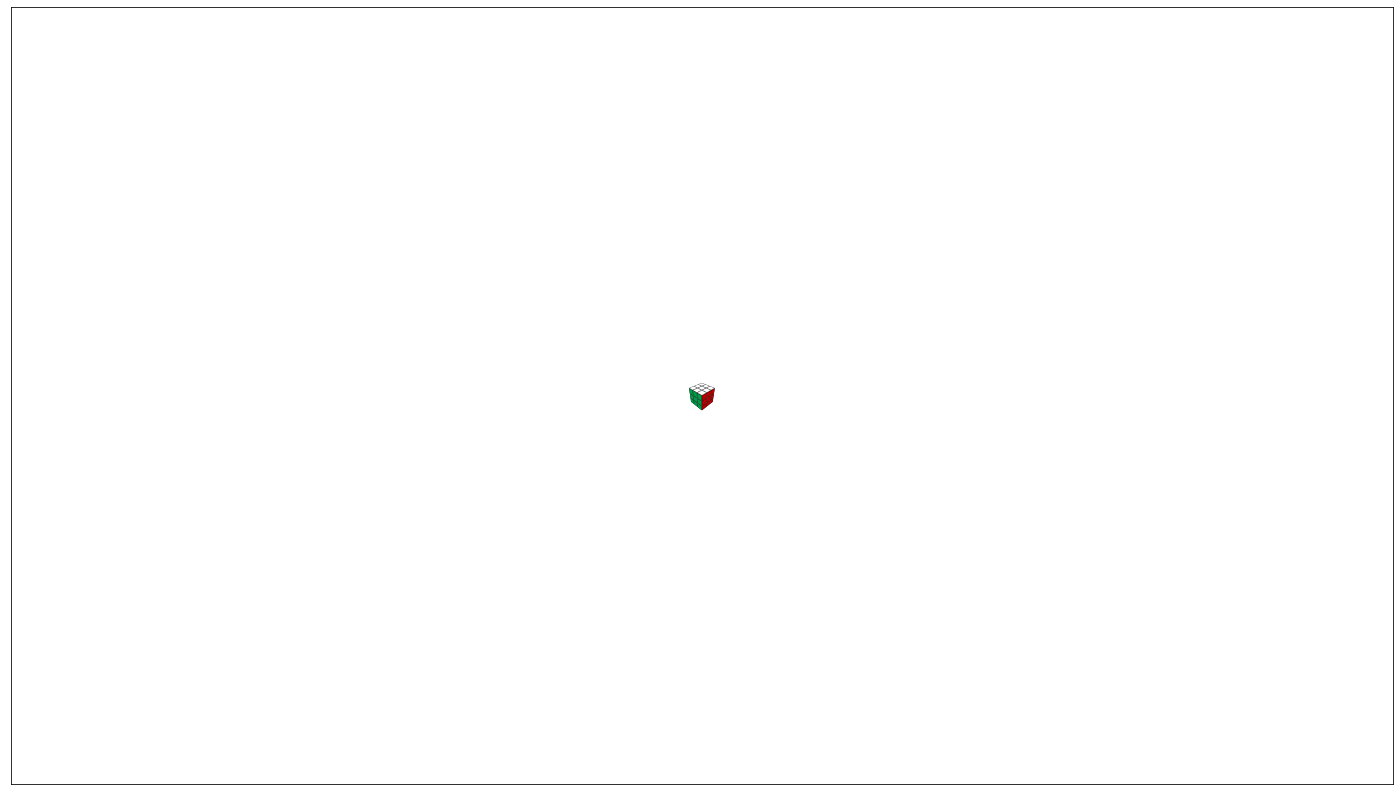

In [ ]:
retrieve('transform.py')
retrieve('rubik.py')

from rubik import new_cube, draw_cube

rubik_cube = new_cube()
draw_cube(rubik_cube, camera)

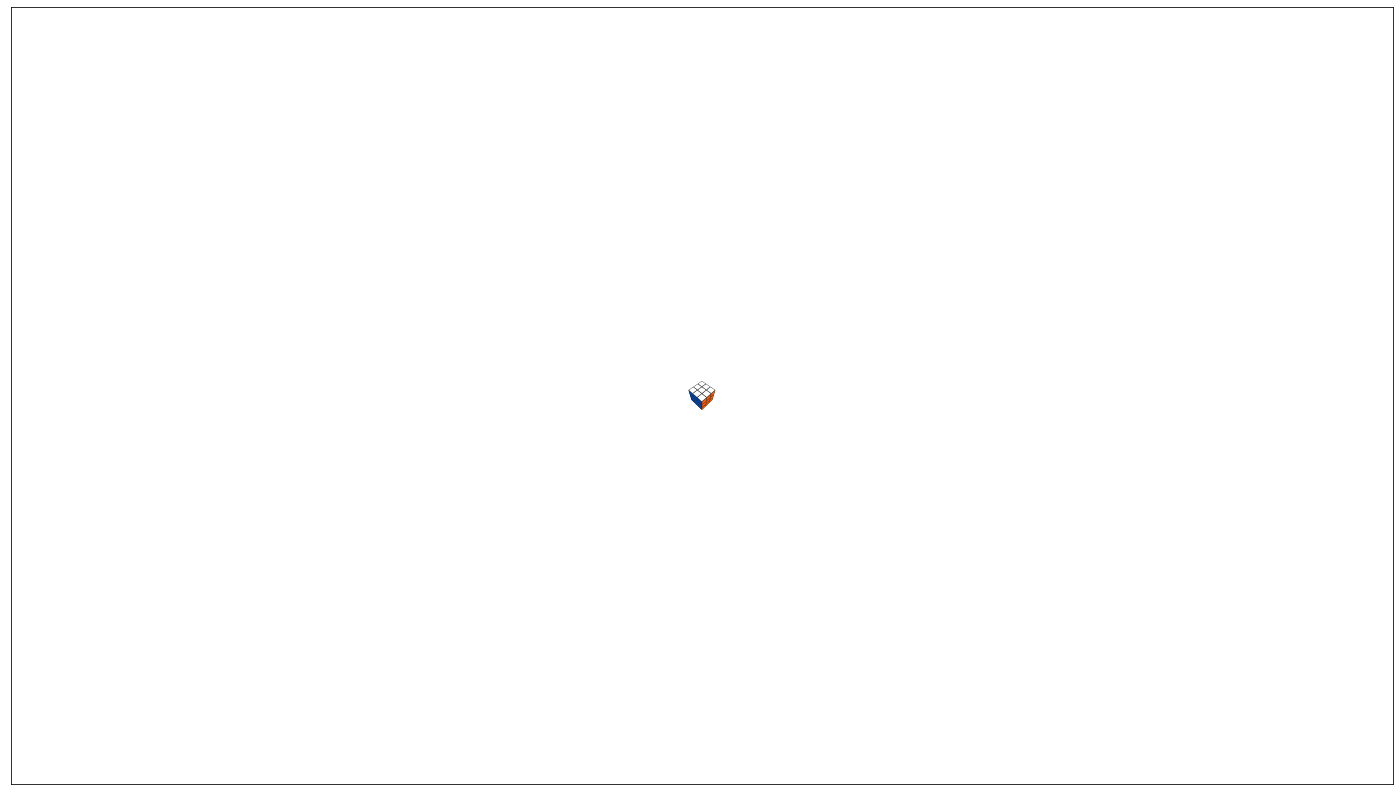

In [ ]:
rear_t_mm = distance_mm * np.array((-1, -1, 2), \
                                   dtype=float) / np.sqrt(6.)

camera = new_camera(radius=radius_mm,t=rear_t_mm,pixels=np.array([1920,1080]),pixel_microns=5)
draw_cube(rubik_cube,camera)